In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
sns.set(rc={'figure.figsize':(11,8)})

In [3]:
df = pd.read_csv('../data/model_list.csv')
df.head()

,Medical Imaging Modality,Biomed Task,ML Task,License,Performance,Supervised,Parameters download,Reference,Link to model,Link to dataset,Parameters link,Comment
0,3D microscopy,Nuclei detection,Segmentation,MIT,0.937 AP,True,False,"Hirsch, Peter, and Dagmar Kainmueller. ""An aux...",https://github.com/Kainmueller-Lab/aux_cpv_loss,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,N/a,dataset comes from private support of another ...
1,Confocal microscopy,Cellular structures reconstruction,Reconstruction,Apache-2.0,0.87 SSIM,True,False,"Vizcaino, Josue Page, et al. ""Learning to Reco...",https://github.com/pvjosue/LFMNet,N/a,N/a,"34.45 PSNR, 0.87 SSIM"
2,Cryo-electron microscopy,Cellular structures reconstruction,Reconstruction,GPL-3.0,2.5 Reconstruction accuracy,False,False,"Zhong, E. D., Bepler, T., Davis, J. H., & Berg...",https://github.com/zhonge/cryodrgn,https://www.ebi.ac.uk/empiar/EMPIAR-10076/,N/a,GAN
3,Cryo-electron microscopy,Protein structures reconstruction,Reconstruction,GPL-3.0,5.82 Angstrom,True,False,"Ullrich, K., Berg, R. V. D., Brubaker, M., Fle...",https://github.com/KarenUllrich/pytorch-backpr...,https://github.com/KarenUllrich/Pytorch-Backpr...,N/a,Validate the backpropagation with FSC
4,CT,Kidney tumor,Segmentation,GPL-3.0,0.95 Dice,True,False,"Müller, D., & Kramer, F. (2021). MIScnn: a fra...",https://github.com/frankkramer-lab/MIScnn,"https://github.com/neheller/kits19, https://d...",N/a,Dice coefficient median 0.9544 for kidney Segm...


In [4]:
df['Parameters storage'] = 'N/a'
gdrive = df.loc[df['Parameters link'].str.contains("drive", case=False, na=False)]
df['Parameters storage'][gdrive.index] = 'Google drive'
dbox = df.loc[df['Parameters link'].str.contains("dropbox", case=False, na=False)]
df['Parameters storage'][dbox.index] = 'Dropbox'
gh = df.loc[df['Parameters link'].str.contains("github", case=False, na=False)]
df['Parameters storage'][gh.index] = 'GitHub'

/tmp/ipykernel_4103/2685241325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Parameters storage'][gdrive.index] = 'Google drive'
/tmp/ipykernel_4103/2685241325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Parameters storage'][dbox.index] = 'Dropbox'
/tmp/ipykernel_4103/2685241325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Parameters storage'][gh.index] = 'GitHub'


In [5]:
df['Data download'] = False
df.loc[df['Link to dataset']!= 'N/a', 'Data download'] = True
df.head()

,Medical Imaging Modality,Biomed Task,ML Task,License,Performance,Supervised,Parameters download,Reference,Link to model,Link to dataset,Parameters link,Comment,Parameters storage,Data download
0,3D microscopy,Nuclei detection,Segmentation,MIT,0.937 AP,True,False,"Hirsch, Peter, and Dagmar Kainmueller. ""An aux...",https://github.com/Kainmueller-Lab/aux_cpv_loss,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,N/a,dataset comes from private support of another ...,N/a,True
1,Confocal microscopy,Cellular structures reconstruction,Reconstruction,Apache-2.0,0.87 SSIM,True,False,"Vizcaino, Josue Page, et al. ""Learning to Reco...",https://github.com/pvjosue/LFMNet,N/a,N/a,"34.45 PSNR, 0.87 SSIM",N/a,False
2,Cryo-electron microscopy,Cellular structures reconstruction,Reconstruction,GPL-3.0,2.5 Reconstruction accuracy,False,False,"Zhong, E. D., Bepler, T., Davis, J. H., & Berg...",https://github.com/zhonge/cryodrgn,https://www.ebi.ac.uk/empiar/EMPIAR-10076/,N/a,GAN,N/a,True
3,Cryo-electron microscopy,Protein structures reconstruction,Reconstruction,GPL-3.0,5.82 Angstrom,True,False,"Ullrich, K., Berg, R. V. D., Brubaker, M., Fle...",https://github.com/KarenUllrich/pytorch-backpr...,https://github.com/KarenUllrich/Pytorch-Backpr...,N/a,Validate the backpropagation with FSC,N/a,True
4,CT,Kidney tumor,Segmentation,GPL-3.0,0.95 Dice,True,False,"Müller, D., & Kramer, F. (2021). MIScnn: a fra...",https://github.com/frankkramer-lab/MIScnn,"https://github.com/neheller/kits19, https://d...",N/a,Dice coefficient median 0.9544 for kidney Segm...,N/a,True


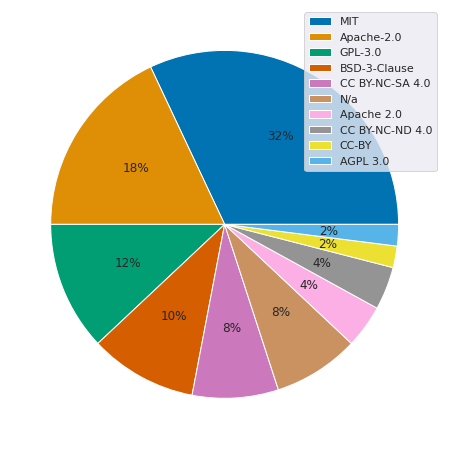

In [48]:
col = 'License'
colors = sns.color_palette('colorblind')[0:len(df[col].unique())]
data = df[col].value_counts()

plt.pie(data, colors=colors, autopct='%.0f%%')
plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

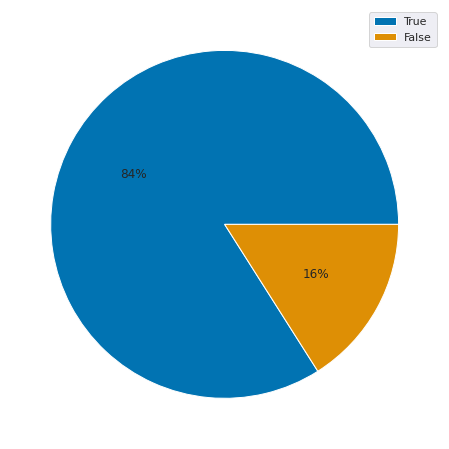

In [49]:
col = 'Data download'
colors = sns.color_palette('colorblind')[0:len(df[col].unique())]
data = df[col].value_counts()

plt.pie(data, colors=colors, autopct='%.0f%%')
plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

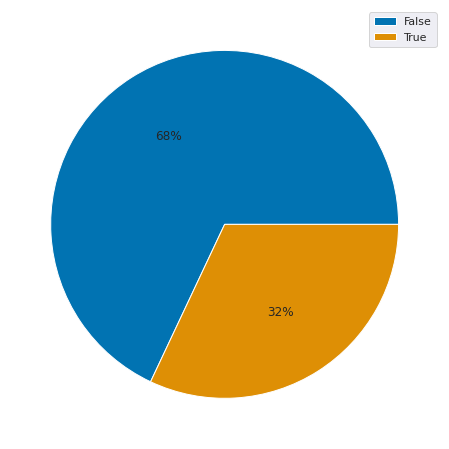

In [50]:
col = 'Parameters download'
colors = sns.color_palette('colorblind')[0:len(df[col].unique())]
data = df[col].value_counts()

plt.pie(data, colors=colors, autopct='%.0f%%')
plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

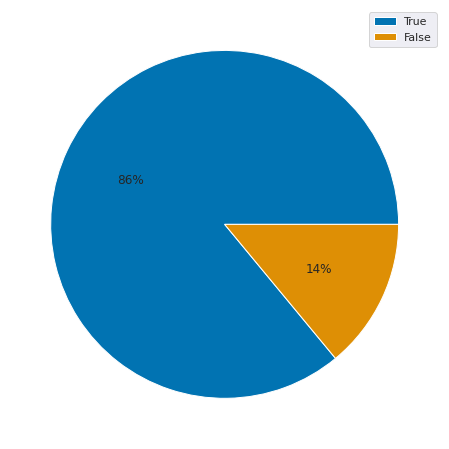

In [51]:
col = 'Supervised'
colors = sns.color_palette('colorblind')[0:len(df[col].unique())]
data = df[col].value_counts()

plt.pie(data, colors=colors, autopct='%.0f%%')
plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

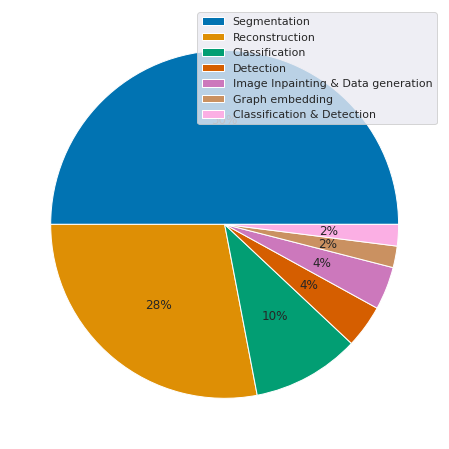

In [52]:
col = 'ML Task'
colors = sns.color_palette('colorblind')[0:len(df[col].unique())]
data = df[col].value_counts()

plt.pie(data, colors=colors, autopct='%.0f%%')
plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

In [55]:
df_p = df.loc[df['Parameters download']==True]
df_p.head()

,Medical Imaging Modality,Biomed Task,ML Task,License,Performance,Supervised,Parameters download,Reference,Link to model,Link to dataset,Parameters link,Comment,Parameters storage,Data download
11,CT,Pulmonary nodule,Segmentation,CC BY-NC-SA 4.0,0.55 IoU,True,True,"Aresta, G., Jacobs, C., Araújo, T., Cunha, A.,...",https://github.com/gmaresta/iW-Net,https://wiki.cancerimagingarchive.net/display/...,https://github.com/gmaresta/iW-Net/blob/master...,NaN,GitHub,True
18,Dermatoscopy,Skin tumor,Classification,MIT,0.81 AUC,True,True,"Zunair, H., & Hamza, A. B. (2020). Melanoma de...",https://github.com/hasibzunair/adversarial-les...,https://challenge.isic-archive.com/data,https://github.com/hasibzunair/adversarial-les...,NaN,GitHub,True
22,Mammography,Breast tumor,Classification,CC BY-NC-ND 4.0,0.93 AUC,True,True,"Shen, Y., Wu, N., Phang, J., Park, J., Liu, K....",https://github.com/nyukat/GMIC,N/a,https://github.com/nyukat/GMIC/tree/master/models,Weakly supervised,GitHub,False
24,Mammography,Breast tumor,Classification,CC BY-NC-SA 4.0,0.84 Accuracy,True,True,"Shen, L., Margolies, L. R., Rothstein, J. H., ...",https://github.com/lishen/end2end-all-conv,https://www.kaggle.com/datasets/awsaf49/cbis-d...,https://drive.google.com/drive/folders/0B1PVLa...,"83.5% accuracy for single Model AUC, 86% accur...",Google drive,True
25,Digital Pathology,Breast tumor,Classification,MIT,0.93 Accuracy,True,True,"Rakhlin, A., Shvets, A., Iglovikov, V., & Kali...",https://github.com/alexander-rakhlin/ICIAR2018,https://rdm.inesctec.pt/dataset/nis-2017-003,https://www.dropbox.com/s/oklwgz5v9suyj1k/ICIA...,"93.8% accuracy, AUC 97.3%, and sensitivity/spe...",Dropbox,True


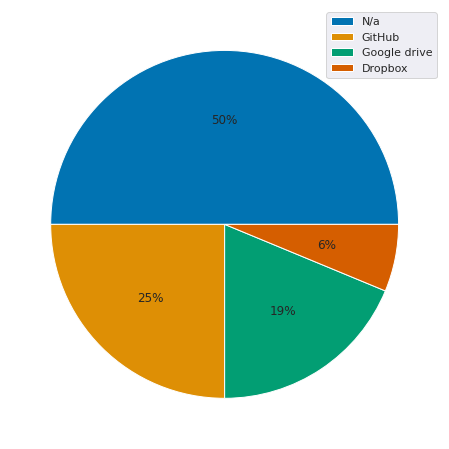

In [56]:
col = 'Parameters storage'
colors = sns.color_palette('colorblind')[0:len(df_p[col].unique())]
data = df_p[col].value_counts()

plt.pie(data, colors=colors, autopct='%.0f%%')
plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

In [57]:
df.loc[(df['ML Task']!='Segmentation')&(df['ML Task']!='Classification')]

,Medical Imaging Modality,Biomed Task,ML Task,License,Performance,Supervised,Parameters download,Reference,Link to model,Link to dataset,Parameters link,Comment,Parameters storage,Data download
1,Confocal microscopy,Cellular structures reconstruction,Reconstruction,Apache-2.0,0.87 SSIM,True,False,"Vizcaino, Josue Page, et al. ""Learning to Reco...",https://github.com/pvjosue/LFMNet,N/a,N/a,"34.45 PSNR, 0.87 SSIM",N/a,False
2,Cryo-electron microscopy,Cellular structures reconstruction,Reconstruction,GPL-3.0,2.5 Reconstruction accuracy,False,False,"Zhong, E. D., Bepler, T., Davis, J. H., & Berg...",https://github.com/zhonge/cryodrgn,https://www.ebi.ac.uk/empiar/EMPIAR-10076/,N/a,GAN,N/a,True
3,Cryo-electron microscopy,Protein structures reconstruction,Reconstruction,GPL-3.0,5.82 Angstrom,True,False,"Ullrich, K., Berg, R. V. D., Brubaker, M., Fle...",https://github.com/KarenUllrich/pytorch-backpr...,https://github.com/KarenUllrich/Pytorch-Backpr...,N/a,Validate the backpropagation with FSC,N/a,True
14,CT,Pulmonary nodule,Detection,Apache-2.0,0.76 FROC AUC,True,False,"Zhu, W., Vang, Y. S., Huang, Y., & Xie, X. (20...",https://github.com/uci-cbcl/DeepEM-for-Weakly-...,"https://biometry.nci.nih.gov/cdas/nlst/ , http...",N/a,Average FROC 76% for DeepEM(Map) and 76.4% for...,N/a,True
15,CT,Pulmonary nodule,Detection,MIT,0.86 FROC AUC,True,False,"Li, Y., & Fan, Y. (2020, April). DeepSEED: 3D ...",https://github.com/ymli39/DeepSEED-3D-ConvNets...,"https://luna16.grand-challenge.org/data , http...",N/a,FROC 86.2% on LUNA16 dataset and 77.3% on LIDC...,N/a,True
26,Mammography,Breast tumor,Image Inpainting & Data generation,CC BY-NC-ND 4.0,0.896 AUC,False,True,"Wu, E., Wu, K., Cox, D., & Lotter, W. (2018). ...",https://github.com/ericwu09/mammo-cigan,https://wiki.cancerimagingarchive.net/display/...,https://github.com/CQFIO/PhotographicImageSynt...,NaN,GitHub,True
31,Digital Pathology,Multiple pathologies,Graph embedding,AGPL 3.0,N/a,False,False,"Jaume, G., Pati, P., Anklin, V., Foncubierta, ...",https://github.com/histocartography/histocarto...,N/a,N/a,Plug and play modules,N/a,False
34,Electron microscopy,Cellular structures reconstruction,Reconstruction,N/a,0.446 IoU,True,False,"Guay, M. D., Emam, Z. A., Anderson, A. B., Aro...",https://github.com/leapmanlab/examples,https://leapmanlab.github.io/dense-cell/,N/a,"private dataset from NIBIB, NIH",N/a,True
35,Fluorescence microscopy,Cellular structures reconstruction,Image Inpainting & Data generation,Apache-2.0,0.71 Quality Score,False,False,"Eschweiler, D., Rethwisch, M., Jarchow, M., Ko...",https://github.com/stegmaierj/CellSynthesis,NaN,N/a,GAN for data generation in 3D microscopy; Data...,N/a,True
39,Mammography,Breast tumor,Classification & Detection,N/a,0.95 AUC,True,True,"Ribli, D., Horváth, A., Unger, Z., Pollner, P....",https://github.com/riblidezso/frcnn_cad,http://marathon.csee.usf.edu/Mammography/Datab...,http://dkrib.web.elte.hu/cad_faster_rcnn/vgg16...,Two of the three datasets available on request...,N/a,True


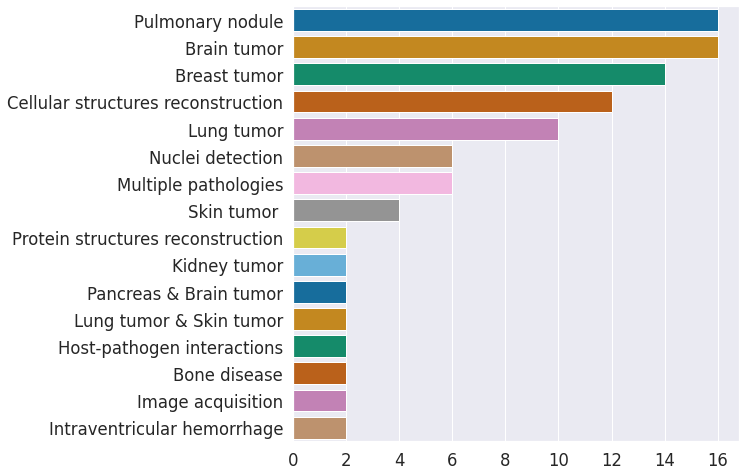

In [53]:
col = 'Biomed Task'
colors = sns.color_palette('colorblind')[0:len(df[col].unique())]
data = df[col].value_counts(normalize=True).mul(100).round(1)
sns.set(rc={'figure.figsize':(8,8)})
sns.set(font_scale = 1.5)

#plt.pie(data, colors=colors, autopct='%.0f%%')
sns.barplot(y=data.index, x=data.values, palette="colorblind")
#plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

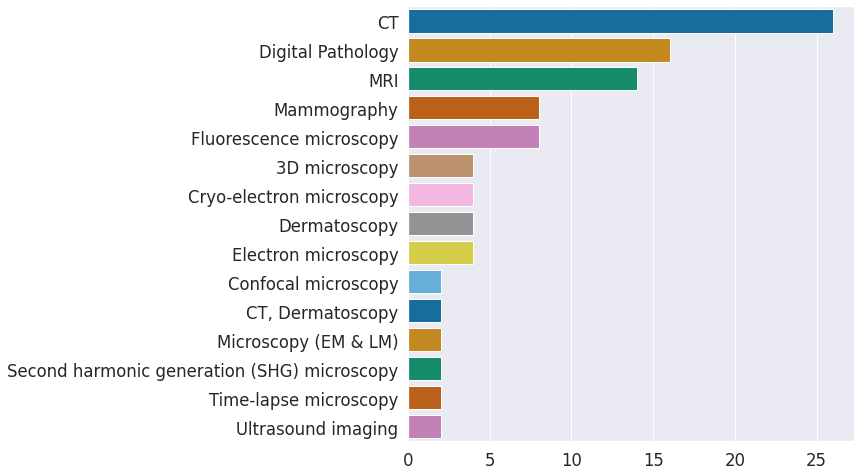

In [54]:
col = 'Medical Imaging Modality'
colors = sns.color_palette('colorblind')[0:len(df[col].unique())]
data = df[col].value_counts(normalize=True).mul(100).round(1)

#plt.pie(data, colors=colors, autopct='%.0f%%')
sns.barplot(y=data.index, x=data.values, palette="colorblind")
#plt.legend(df[col].unique(), loc="best")
plt.savefig(f'../figs/{col}.svg', format='svg')
plt.show()

In [15]:
df['Journal'] = 'Other'

In [16]:
arXiv = df.loc[df['Reference'].str.contains("arXiv", case=False, na=False)]
df['Journal'][arXiv.index] = 'arXiv'

ieee = df.loc[df['Reference'].str.contains("IEEE", case=False, na=False)]
df['Journal'][ieee.index] = 'IEEE'

springer = df.loc[df['Reference'].str.contains("Springer", case=False, na=False)]
df['Journal'][springer.index] = 'Springer'

nat = df.loc[df['Reference'].str.contains("Scientific reports", case=False, na=False)]
nat.append(df.loc[df['Reference'].str.contains("Nature", case=False, na=False)])
df['Journal'][nat.index] = 'NPG'

/tmp/ipykernel_4103/1946966097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Journal'][arXiv.index] = 'arXiv'
/tmp/ipykernel_4103/1946966097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Journal'][ieee.index] = 'IEEE'
/tmp/ipykernel_4103/1946966097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Journal'][springer.index] = 'Springer'
/tmp/ipykernel_4103/1946966097.py:12: SettingWithCopyWarning: 
A value is t

In [17]:
df.groupby('Journal')['Parameters download'].mean()

Journal
IEEE        0.250000
NPG         0.428571
Other       0.400000
Springer    0.307692
arXiv       0.142857
Name: Parameters download, dtype: float64